# TRABALHO INFER√äNCIA ESTAT√çSTICA - ARTHUR MARTINS 

In [108]:
import numpy as np
from scipy.stats import binom, bernoulli, norm
import matplotlib.pyplot as plt

(a) A propor√ß√£o de tentativas de rela√ß√£o bem sucedidas no trabalho de Sildenafil pode ser calculada para cada indiv√≠duo e ser aproximada por uma distribui√ß√£o Normal atrav√©s do uso de que teorema da infer√™ncia estat√≠stica?

**Resposta:** Definamos $Xs_i$ a vari√°vel aleat√≥ria dada como sucesso para cada indiv√≠duo que utilizou Sildenafil por pelo menos 4 semanas (como o artigo visto em sala sugere) e $Xp_i$ o sucesso para cada indiv√≠duo sob efeito placebo, ou seja, as Vari√°veis Aleat√≥rias que caracterizam os **dois** grupos de estudo.
Portanto, cada V.A. assume distribui√ß√£o Binomial com par√¢metros p (probabilidade de sucesso, onde sucesso $\equiv$ rem√©dio funcionou $\equiv$ 1 na tabela) e par√¢metros m = n√∫mero de tentativas totais por indiv√≠duo, dentre as quais se esperam x tentativas bem sucedidas.

$$ 
X_{s_i} \sim \text{Binomial}(m_s,p_s) 
$$

$$
X_{p_i} \sim \text{Binomial}(m_p,p_p)
$$

$$
f_X(x)=\binom{m}{x}p^x(1-p)^{m-x},  R_x=\{0,1,...,m\}
$$

Observe que para condu√ß√£o dos experimentos, supomos que cada observa√ß√£o √© independente; ou seja, o efeito da consuma√ß√£o do rem√©dio j√° se esgotou at√© sua pr√≥xima ingest√£o e respectiva tentativa do paciente observado.

Cada par√¢metro $p_s$ e $p_p$ ser√° estimado corretamente de acordo com as tabelas do artigo. Veja que no item b), proponho uma exemplifica√ß√£o gen√©rica de como o experimento est√° organizado.

Tamb√©m, vamos assumir que $m_s$ e $m_p$ s√£o sempre fixos para todos indiv√≠duos grupais. Ou seja, cada um dos n indiv√≠duos, dos grupos 1 (Sildenafil) e grupos 2 (Placebo), tiveram, durante as 4 semanas de experimento, o mesmo n√∫mero de tentativas $\Rightarrow$ $ms_1$ = $ms_2$ = ... = $ms_n$ e $mp_1$ = $mp_2$ = ... = $mp_n$. Tais simplifica√ß√µes ser√£o √∫teis para aplicarmos o TLC, concluir resultados te√≥ricos e supor normalidade assint√≥tica na nossa distribui√ß√£o da propor√ß√£o para os grupos, pois assim, estaremos assumindo distribui√ß√µes id√™nticas para cada $X_i$. 

O artigo tamb√©m fornece que dos 3254 homens totais, 2123 consumiram sildenafil e 1131 "consumiram" o medicamento placebo.

Assim, a **propor√ß√£o total de rela√ß√µes bem sucedidas no trabalho de Sildenafil pode ser aproximada por uma distribui√ß√£o normal, pelo Teorema do Limite Central**, j√° que nosso n√∫mero de observa√ß√µes por amostra (quantidade de homens participantes) √© suficientemente grande

C√âLULA 1

Simulemos v√°rias tentativas do uso dos rem√©dios de cada paciente (por grupo). Observe que basicamente coletam-se os 2123 pacientes de Sildenafil e os 1131 pacientes de placebo.
Como o processo de gerar amostras aleat√≥rias com distribui√ß√£o requer fixar par√¢metros; suponha que ap√≥s estudos, concluiu-se o seguinte resultado por grupo:

**Grupo Sildenafil**
cada paciente tomou o rem√©dio 8 vezes.
\
do total de tentativas bem sucedidas para cada pessoa, a propor√ß√£o observada (p) foi de 65%.

**Grupo Placebo**
cada paciente tomou o rem√©dio 10 vezes.
\
do total de tentativas bem sucedidas para cada pessoa, a propor√ß√£o observada (p) foi de 30%.

In [474]:
# C√âLULA 1
np.random.seed(123)

m_s = 8
p_s = 0.65
obs_s = 1
N_s = 2123

pontos_amostrais_sildenafil = []

for _ in range(N_s):
    X_s = binom.rvs(m_s, p_s, size = obs_s)
    pontos_amostrais_sildenafil.extend(X_s)


m_p = 10
p_p = 0.3
obs_p = 1
N_p = 1131

pontos_amostrais_placebo = []

for _ in range(N_p):
    X_p = binom.rvs(m_p, p_p, size = obs_p)
    pontos_amostrais_placebo.extend(X_p)


print("n√∫mero de tentativas bem sucedidas para os 5 primeiros pacientes de sildenafil",pontos_amostrais_sildenafil[0:5])
print("n√∫mero de tentativas bem sucedidas para os 5 √∫ltimos pacientes de sildenafil",pontos_amostrais_sildenafil[-6:-1])
#type(pontos_amostrais_sildenafil)

print("n√∫mero de tentativas bem sucedidas para os 5 primeiros pacientes de placebo", pontos_amostrais_placebo[0:5])
print("n√∫mero de tentativas bem sucedidas para os 5 √∫ltimos pacientes de placebo",pontos_amostrais_placebo[-6:-1])
#type(pontos_amostrais_placebo)

print('e assim por diante...')

n√∫mero de tentativas bem sucedidas para os 5 primeiros pacientes de sildenafil [5, 6, 6, 5, 4]
n√∫mero de tentativas bem sucedidas para os 5 √∫ltimos pacientes de sildenafil [7, 4, 3, 5, 5]
n√∫mero de tentativas bem sucedidas para os 5 primeiros pacientes de placebo [2, 2, 2, 7, 2]
n√∫mero de tentativas bem sucedidas para os 5 √∫ltimos pacientes de placebo [6, 2, 3, 3, 4]
e assim por diante...


Nota-se que quanto menor o par√¢metro populacional p, a distribui√ß√£o torna-se assim√©trica √† esquerda. Enquanto que quando o par√¢metro aproxima-se de 0.5, a distribui√ß√£o torna-se sim√©trica em torno de p. Essas propriedades n√£o necessariamente s√£o gen√©ricas de uma distribui√ß√£o binomial com par√¢metros p fixos como especificados acima e par√¢metro m variando, mas acontecem no caso em que m = 10 e m = 8, como proposto no estudo.

Os plots abaixo da fun√ß√£o massa de probabilidade para somente um paciente de cada grupo (uma √∫nica VA), por exemplo, explicitam quais s√£o os n√∫meros de tentativas bem sucedidas com maior probabilidade e menor probabilidade (repare que n√£o necessariamente os valores mais esperados, j√° que para uma ${X} \sim {Bin}(m,p)$, $E[X] = mp $). 

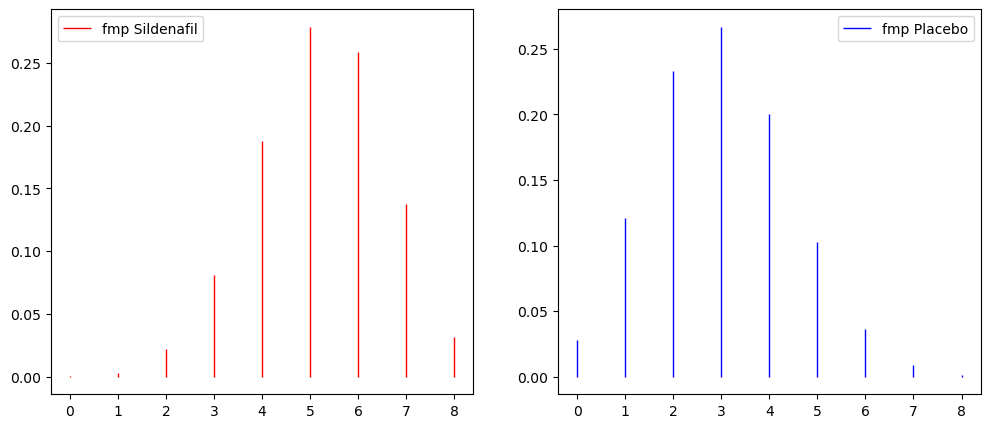

In [477]:
# PLOTANDO uma √∫nica fmp para uma pessoa de cada grupo:
fig, (fmp1, fmp2) = plt.subplots(1, 2, figsize = (12,5))

# fmp binomial sildenafil
rv1 = binom(m_s, p_s)

fmp1.vlines(x, 0, rv1.pmf(x), colors='red', linestyles='-', lw=1, label='fmp Sildenafil')
fmp1.legend(loc='upper left')

#fmp binomial placebo
rv2 = binom(m_p,p_p)

fmp2.vlines(x, 0, rv2.pmf(x), colors='blue', linestyles='-', lw=1, label='fmp Placebo')
fmp2.legend(loc='upper right')


plt.show()

A simula√ß√£o abaixo confirma que o TLC pode ser aplicado para aproximar a distribui√ß√£o binomial proposta no item (a), j√° que nosso n√∫mero de pacientes √© suficientemente grande. Repare que os histogramas montados para cada grupo de estudo assemelham-se a distribui√ß√µes normais com os par√¢metros especificados na legenda dos gr√°ficos.

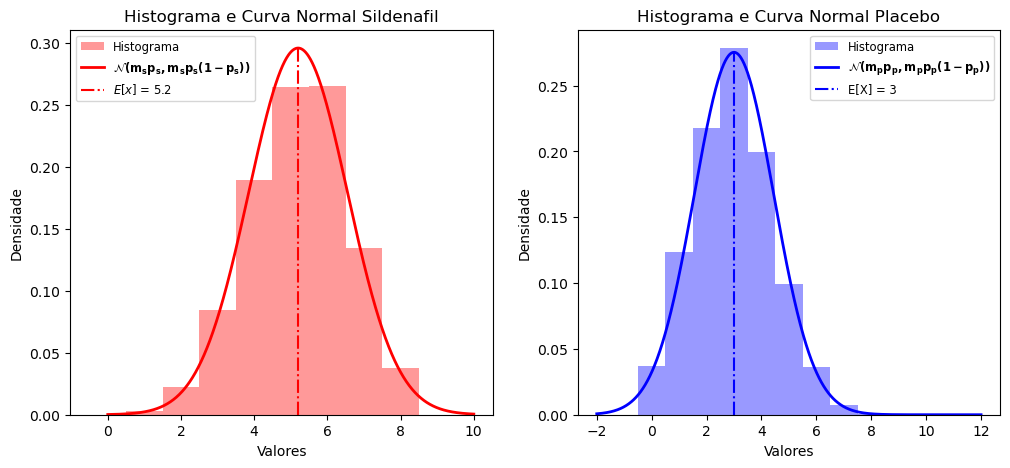

In [468]:
# aqui utilizemos de pontos_amostrais list para plotar os gr√°ficos

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# histograma primeiro subplot
ax1.hist(pontos_amostrais_sildenafil, bins=range(m_s+2), align = 'left', density=True, alpha=0.4, label='Histograma', color = 'red')

# Plot normal densidade primeiro subplot
x_values_1 = np.linspace(0, m_s+2, 1000)  # Range of x 
normal_distribution = norm(loc=m_s * p_s, scale=np.sqrt(m_s * p_s * (1 - p_s)))  
ax1.plot(x_values_1, normal_distribution.pdf(x_values_1), color='red', linewidth=2, label=r'$\mathbf{\mathcal{N}(m_sp_s, m_sp_s(1-p_s))}$')

# nomencalturas 1
ax1.set_xlabel('Valores')
ax1.set_ylabel('Densidade')
ax1.set_title('Histograma e Curva Normal Sildenafil')
ax1.axvline(5.2, color = 'red', ymax = 0.95, label = '$E[x]$ = 5.2', linestyle = '-.')
ax1.legend(loc = 'upper left', fontsize = 'small')


# histograma segundo subplot
ax2.hist(pontos_amostrais_placebo, bins=range(m_p+2), align = 'left', density=True, alpha=0.4, label='Histograma', color = 'blue')

# Plot normal densidade segundo subplot
x_values_2 = np.linspace(-2, m_p+2, 1000)  # Range of x 
normal_distribution = norm(loc=m_p * p_p, scale=np.sqrt(m_p * p_p * (1 - p_p)))  
ax2.plot(x_values_2, normal_distribution.pdf(x_values_2), color='blue', linewidth=2, label=r'$\mathbf{\mathcal{N}(m_pp_p, m_pp_p(1-p_p))}$')

# nomencalturas 2
ax2.set_xlabel('Valores')
ax2.set_ylabel('Densidade')
ax2.set_title('Histograma e Curva Normal Placebo')
ax2.axvline(3, color = 'blue', ymax = 0.945, label = 'E[X] = 3', linestyle = '-.')
ax2.legend(loc = 'upper right', fontsize = 'small')


plt.show()

Observe que cada vez que a c√©lula de c√≥digo 1 √© rodada, obtemos uma nova simetria e forma de histograma e fun√ß√£o densidade para cada grupo de estudo, j√° que a fun√ß√£o da c√©lula 1 √© gerar valores rand√¥micos para cada vari√°vel aleat√≥ria de estudo toda vez que ela √© rodada.

(b) Defina uma nota√ß√£o para formalizar a propor√ß√£o observada em cada indiv√≠duo, o estimador de interesse e a distribui√ß√£o assint√≥tica desse estimador (com respectivos par√¢metros), sob as condi√ß√µes do teorema. Lembre que o projeto tem dois grupos de estudo e pense na correta especifica√ß√£o envolvendo esses grupos.

\
Suponhamos que o experimento fora organizado da seguinte maneira:

Para cada paciente, de cada grupo, organizaram-se as tentativas. Assim, uma tentativa falha equivale a 0, enquanto uma tentativa sucedida equivale a 1. Veja na tabela artificial abaixo, por exemplo. Note que o n√∫mero de tentativas por pessoa, durante as 4 semanas, n√£o √© igual. Para fins te√≥ricos, como comentado no item (a), estabeleci que todas pessoas do grupo Sildenafil realizaram o mesmo n√∫mero de tentativas durante o per√≠odo de estudo e todas do grupo Placebo tiveram o mesmo n√∫mero de tentativas, tamb√©m, pois isso facilita simula√ß√µes. Veja que para um estudo mais preciso, poder√≠amos agrupar os pacientes de cada grupo por n√∫mero de tentativas (100 pacientes tentaram 6 vezes, 20 tentaram 10 vezes, 80 tentaram 5, e assim por diante), poder√≠amos introduzir a vari√°vel tempo e usar outra distribui√ß√£o, etc.

$$
\begin{array}{|c|c|c|}
\hline
\textbf{Paciente 1} & \textbf{Paciente 2} & \textbf{Paciente 3} \\
\hline
1 & 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 0 \\
1 & 0 & 0\\
0 & 1 & 1\\
1 &   & 1\\
1 &   & \\
1 &   & \\
\hline
\end{array}
$$

Os nossos estimadores de interesse s√£o $p_s$ e $p_p$ (justamente as propor√ß√µes) e podem ser encontrados a partir do m√©todo de m√°xima verossimilhan√ßa aplicado √†s distribui√ß√µes binomiais do item (a), onde *$\theta$* = (m,p) √© vetor.

$$
L{(\theta, x_i)} = \prod_{i=1}^{n} \binom{m}{x_i} p^x_i (1-p)^{m-x_i}  
$$

$$
\Leftrightarrow
$$

$$
\ln{L{(\theta, x_i)}} = l{(\theta)} = \sum_{i=1}^{n} \ln{\binom{m}{x_i}} + \ln{p} \sum_{i=1}^{n} x_i + \ln{(1-p)}(mn - \sum_{i=1}^{n} x_i)
$$

O estimador de maximaverossimilhan√ßa de p, nossa propor√ß√£o, √© dado por $\hat{p}$ e encontrado ${\hat{p}}=\underset{\theta \in \Theta}{\arg \max } \mathcal{L}\left(\theta,¬†x_i\right)$, ou seja, derivando-se $l{(\theta)}$ e igualando a derivada a zero:

$$
\frac{\partial l{(\theta)}}{\partial p} = 0 \Rightarrow
$$

$$
\frac{\sum_{i=1}^{n} x_i}{\hat{p}} = \frac{mn - \sum_{i=1}^{n} x_i}{1-\hat{p}} \Leftrightarrow
$$

$$
\hat{p} = \frac{\sum_{i=1}^{n} x_i}{mn} = \frac{\bar{X}}{m}
$$

Assim, a propor√ß√£o pedida no enunciado √© $\hat{p}$, como encontrado acima. Formalizando a propor√ß√£o para o grupo de sildenafil e placebo, respectivamente, podemos aproximar assintoticamente a distribui√ß√£o de $\hat{p}$, utilizando o seguinte teorema:

$$
\sqrt{n}(\hat{p} - p) \overset{a}{\sim} {N}(0,\frac{1}{I_{f1}(p)})
$$

$$
{I_{f1}(p)} = - E[\frac{\partial^2 l{(x_1,\theta)}}{\partial p^2}] = - E[\frac{\partial^2 \ln{\binom{m}{x_1}} + x_1\ln{p} + (m-x_1)\ln{(1-p)}}{\partial p^2}] \Leftrightarrow
$$

$$
{I_{f1}(p)} = \frac{E[x_1]}{p^2} - \frac{E[x_1]}{(1-p^2)} + \frac{m}{(1-p)^2} \Leftrightarrow 
$$

$$
{I_{f1}(p)} = \frac{mp}{p^2}-\frac{mp}{(1-p)^2}+\frac{m}{(1-p)^2} \Leftrightarrow 
$$

$$
{I_{f1}(p)} = \frac{m}{p(1-p)}
$$

Portanto, 

$$
\frac{1}{{I_{f1}(p)}} = \frac{p(1-p)}{m}
$$

Logo, para os grupos de Sildenafil e placebo, respectivamente, as propor√ß√µes (estimadores) t√™m distribui√ß√µes assint√≥ticas:

$$
\frac{\bar{X_{s}}}{m_s} \overset{a}{\sim} {Normal}(0,\frac{p_s(1-p_s)}{m_s})
$$

$$
\frac{\bar{X_{p}}}{m_p} \overset{a}{\sim} {Normal}(0,\frac{p_p(1-p_p)}{m_p})
$$

Simulando distribui√ß√µes assint√≥ticas de 

$$\frac{\bar{X}}{m}$$

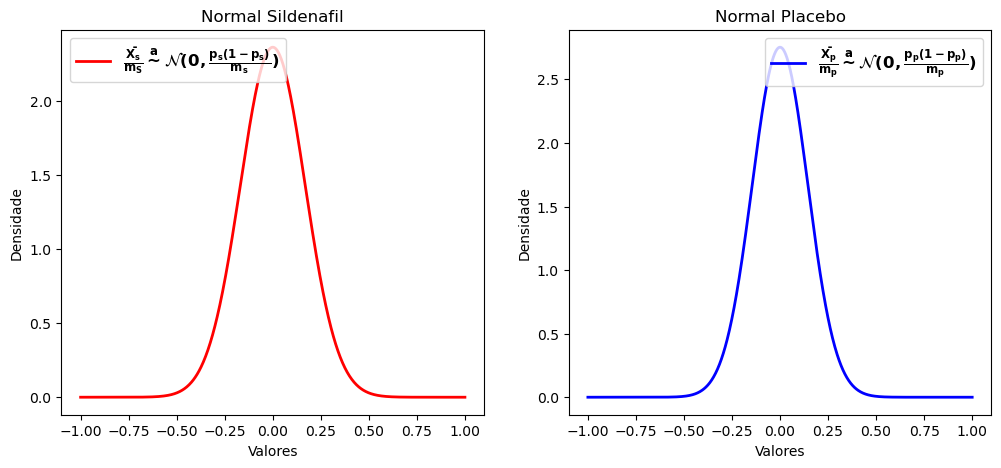

In [469]:
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 5))

# Plot normal densidade terceiro subplot
x_values_3 = np.linspace(-1, 1, 1000)
normal_distribution_3 = norm(loc=0, scale=np.sqrt(p_s * (1 - p_s) / m_s))
ax3.plot(x_values_3, normal_distribution_3.pdf(x_values_3), color='red', linewidth=2, 
         label=r'$\mathbf{\frac{\bar{X_s}}{m_S} \overset{a}{\sim} \mathcal{N}(0, \frac{p_s(1-p_s)}{m_s})}$')

# nomenclaturas 
ax3.set_xlabel('Valores')
ax3.set_ylabel('Densidade')
ax3.set_title('Normal Sildenafil')
ax3.legend(loc = 'upper left', fontsize  = 'large')

# Plot normal densidade quarto subplot
x_values_4 = np.linspace(-1, 1, 1000)
normal_distribution_4 = norm(loc=0, scale=np.sqrt(p_p * (1 - p_p) / m_p))
ax4.plot(x_values_4, normal_distribution_4.pdf(x_values_3), color='blue', linewidth=2, 
         label=r'$\mathbf{\frac{\bar{X_p}}{m_p} \overset{a}{\sim} \mathcal{N}(0, \frac{p_p(1-p_p)}{m_p})}$')

# nomenclaturas 
ax4.set_xlabel('Valores')
ax4.set_ylabel('Densidade')
ax4.set_title('Normal Placebo')
ax4.legend(loc = 'upper right', fontsize = 'large')


plt.show()

c) Por outro lado, suponha que propor√ß√£o de tentativas bem sucedidas siga uma distribui√ß√£o Normal, com par√¢metros diferentes em cada grupo. Quais s√£o os EMV dos par√¢metros de interesse e respectiva distribui√ß√£o assint√≥tica?

Nessa quest√£o, estamos assumindo, necessariamente, que as propor√ß√µes de tentativas bem sucedidas, dos grupos Sildenafil e Placebo, respectivamente, s√£o Normais. Isto √©:

**1)**
$$
\frac{\bar{X_{s}}}{m_s} \sim {Normal}(\mu_s,\sigma^2_s)
$$

**2)**

$$
\frac{\bar{X_{p}}}{m_p} \sim {Normal}(\mu_p,\sigma^2_p)
$$

Sabemos, pelo m√©todo de m√°xima-verossimilhan√ßa que o EMV($\mu$) = $\hat{\mu}$ = $\frac{\sum_{i=1}^{n} x_i}{n}$ = $\bar{X}$ e EMV($\sigma^2$) = $\hat{\sigma^2}$ = $\frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n}$ (note que $\hat{\sigma^2}$ √© estimador viciado de $\sigma^2$).

Logo, como a V.A. $\frac{\bar{X}}{m}$ √© assumida exatamente normal, e $\bar{X}$ √© estimador de $\mu$, ent√£o $\bar{X}$ tem distribui√ß√£o exata (e consequentemente tamb√©m assint√≥tica) dada por:

$$
\bar{X} \sim {Normal}(\mu,\frac{\sigma^2}{n})
$$

Para se obter a distribui√ß√£o assint√≥tica (e repare que n√£o exata) de $\hat{\sigma^2}$, √© uma tarefa √°rdua, ent√£o, podemos obter a distribui√ß√£o exata de $\frac{(n-1){S^2}}{\sigma^2}$ $\sim$ $ùúí^{2}_{(n-1)}$, onde ${S^2}$ = $\frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n-1}$ (vari√¢ncia amostral) √© estimador n√£o viciado de $\sigma^2$

Portanto,

$$
\hat{\mu}_{sildenafil} \sim {Normal}(\mu_s,\frac{\sigma^2_s}{n})
$$

$$
\hat{\mu}_{placebo} \sim {Normal}(\mu_p,\frac{\sigma^2_p}{n})
$$

e tamb√©m temos que:


$$
\frac{(n-1){S^2}_{sildenafil}}{\sigma^2_{sildenafil}} \sim ùúí^{2}_{(n_{s}-1)}
$$

$$
\frac{(n-1){S^2}_{placebo}}{\sigma^2_{placebo}} \sim ùúí^{2}_{(n_{p}-1)}
$$

(d) Quais as propriedades desses estimadores? S√£o propriedades assint√≥ticas ou exatas?

Depende. Caso estejamos falando do item (b), como aproximamos a distribui√ß√£o da nossa propor√ß√£o ($\frac{\bar{X}}{m}$) assintoticamente via uma normal, a partir do teorema enunciado no pr√≥prio item, as propriedades do estimador, como consist√™ncia, v√≠cio e EQM seriam assint√≥ticas. Assim, um n√∫mero suficientemente grande de amostras, como o n√∫mero de homens no experimento, poderia garantir boas propriedades assint√≥ticas para os estimadores propostos. Pode-se conferir tais propriedades a partir de simula√ß√µes

Agora, tratando do item (c), ambas distribui√ß√µes encontradas para os estimadores $\hat{\mu}$ e $\hat{\sigma^2}$ s√£o exatas, e n√£o aproximadas; j√° que o enunciado sugere suposi√ß√£o de que o estimador da propor√ß√£o, nosso $\hat{p}$ = $\frac{\bar{X}}{m}$, assume distribui√ß√£o Normal. Ent√£o, a partir da constru√ß√£o feita acima no item (c), obtivemos propriedades exatas.

(e) Fa√ßa um estudo de simula√ß√£o, an√°logo ao realizado no exerc√≠cio 8 da na prova 1, por√©m considerando a distribui√ß√£o Normal ao inv√©s da Beta. Especifique quais par√¢metros voc√™ fixou para a simula√ß√£o e justifique sua escolha.

**Resposta**: Para esse exerc√≠cio, irei utilizar as distribui√ß√µes Normais encontradas no item(a), j√° que o enunciado deixa livre escolha. A escolha dos par√¢metros j√° foi justificada no item (a), ent√£o s√≥ realizo uma r√°pido resumo a seguir.

Sabemos que a distribui√ß√£o $\mathcal{N}(\mu,\sigma^2)$ tem forma fechada para seus estimadores n√£o viciados de m√°xima verossimilhan√ßa, o que dispensa m√©todos num√©ricos como Newton-Raphson:

$$
\hat{\mu} = \frac{\sum_{i=1}^{n} x_i}{n} = \bar{X}
$$

$$
\hat{\sigma^2} = {S^2} = \frac{ \sum_{i=1}^{n}(x_i - \bar{x})^2 }{n-1}
$$


Para as distribui√ß√µes normais que simulamos no item (a), $\mathcal{N}(m_sp_s, m_sp_s(1-p_s))$ e $\mathcal{N}(m_pp_p, m_pp_p(1-p_p))$, podemos calcular valores estimados (amostrais) $\hat{\mu}$ e $\hat{\sigma^2}$ e os valores te√≥ricos (populacionais) $\mu$ e $\sigma^2$.

Comecemos pelos valores te√≥ricos, supondo que nossa distribui√ß√£o para o grupo sildenafil, ap√≥s fixarmos aqueles valores para $m_s$ e $p_s$ no come√ßo do item (a), seja a seguinte:

$$
\mathcal{N}(m_sp_s, m_sp_s(1-p_s) \Rightarrow
$$

$$
\mathcal{N}(8 * 0.65, 8 * 0.65 * (1-0.65)) \Leftrightarrow
$$

$$
\mathcal{N}(5.2, 1.82)
$$

Analogamente para o grupo Placebo:

$$
\mathcal{N}(10 * 0.3, 10 * 0.3 * (1-0.3)) \Leftrightarrow
$$

$$
\mathcal{N}(3,2.1)
$$

Portanto, conclui-se facilmente que os valores te√≥ricos e populacionais (e veja que assint√≥ticos tamb√©m, j√° que aproximamos uma binomial por uma Normal) s√£o:

$$
\mu_{sildenafil} = 5.2 
$$
$$
\sigma^2_{sildenafil} = 1.82
$$

e

$$
\mu_{placebo} = 3 
$$
$$
\sigma^2_{placebo} = 2.1 
$$

Agora partindo para os valores estimados (amostrais), usemos as simula√ß√µes do item (a)

Os comandos abaixo j√° usam as f√≥rmulas dos estimadores n√£o viciados, como √© proposto por $\bar{X}$ e ${S^2}$ 

In [473]:
media_sildenafil = np.mean(pontos_amostrais_sildenafil)
print(f'mu_estimador_sildenafil = {media_sildenafil}')

var_sildenafil = np.var(pontos_amostrais_sildenafil, ddof  = 1)
print(f'sigma^2_estimador_sildenafil = {var_sildenafil}')


media_placebo = np.mean(pontos_amostrais_placebo)
print(f'mu_estimador_placebo = {media_placebo}')

var_placebo = np.var(pontos_amostrais_placebo, ddof = 1)
print(f'sigma^2_estimador_placebo = {var_placebo}')

mu_estimador_sildenafil = 5.208666980687706
sigma^2_estimador_sildenafil = 1.8767957245783913
mu_estimador_placebo = 2.962864721485411
sigma^2_estimador_placebo = 2.1048144409755642


Nossos resultados s√£o:

$$
\hat{\mu}_{sildenafil} = 5.208666980687706, 
$$
$$
\hat{\sigma^2}_{sildenafil} = 1.8767957245783913
$$

e

$$
\hat{\mu}_{placebo} = 2.962864721485411, 
$$
$$
\hat{\sigma^2}_{placebo} = 2.1048144409755642
$$

Podemos perceber que eles s√£o muito pr√≥ximos dos valores te√≥ricos relatados, j√° que o alto n√∫mero de pacientes em estudo fornece uma boa aproxima√ß√£o assint√≥tica para m√©dia e vari√¢ncia de Normais

Agora, iremos para os c√°lculos dos V√≠cios e Erros Quadr√°ticos m√©dios para estimadores. Note que os valores tamb√©m ser√£o assint√≥ticos, j√° que usamos o TLC.

Primeiro, comecemos com os valores amostrais te√≥ricos e logo em seguida vamos simular:
\
Para um estimador qualquer $\theta$:
$$
\mathcal{B}_{\theta}(\hat{\theta}) = E[\hat{\theta}] - {\theta}
$$
\
$$
\mathcal{B}_{\mu}(\hat{\mu}_{sildenafil}) = 5.2 - 5.2 = 0
$$
$$
\mathcal{B}_{\sigma^2}(\hat{\sigma^2}_{sildenafil}) = E[\hat\sigma^2_{sildenafil}] - \sigma^2_{sildenafil} = E[{S^2}_{sildenafil}] - \sigma^2_{sildenafil} = 0
$$

De maneira an√°loga, 

$$
\mathcal{B}_{\mu}(\hat{\mu}_{placebo}) = 0
$$
$$
\mathcal{B}_{\sigma^2}(\hat{\sigma^2}_{placebo}) = 0
$$

Os resultados te√≥ricos nulos s√£o totalmente esperados, j√° que os estimadores s√£o **n√£o viciados**

\
$$
EQM[\hat{\theta}] = {E}[(\hat{\theta} - \theta)^2] = Var(\hat\theta) + \mathcal{B}^2_{\theta}(\hat\theta)
$$


como os estimadores s√£o n√£o viciados, ent√£o:

$$
EQM[\hat{\theta}] = Var(\hat\theta)
$$

$$
EQM[\hat{\mu}_{sildenafil}] = Var(\bar{X}_{sildenafil}) = \frac{\sigma^2_{sildenafil}}{n} = \frac{1.82}{2123} \approx 0.0008572774
$$

$$
EQM[\hat{\sigma^2}_{sildenafil}] = Var({S^2}_{sildenafil}) = \frac{2(\sigma^2_{sildenafil})^2}{n-1} = \frac{2*(1.82)^2}{2123-1} \approx 0.00312196
$$


A rela√ß√£o do EQM para ${S^2}$ √© facilmente obtida notando-se que se Y = $\frac{(n-1){S^2}}{\sigma^2}$ $\sim$ $\mathcal{\chi}^{2}_{(n-1)}$, $Var(Y)$ = $2(n-1)$ $\Rightarrow$ $Var({S^2}) = \frac{2(\sigma^2)^2}{n-1}$


De maneira an√°loga ao grupo placebo, temos o resultado te√≥rico:

$$
EQM[\hat{\mu}_{placebo}] = \frac{2.1}{1131} \approx 0.00185676
$$

$$
EQM[{S^2}_{placebo} = \frac{2*(2.1)^2}{1131-1} \approx 0.00780531
$$

In [480]:
bias_mu_sildenafil = media_sildenafil - 5.2
eqm_mu_sildenafil = np.mean( (media_sildenafil - 5.2)**2 )

bias_S_sildenafil = np.mean(var_sildenafil) - 1.82
eqm_S_sildenafil = np.mean( (var_sildenafil - 1.82)**2 )

print("vicio mu sildenafil",bias_mu_sildenafil)
print("vicio S sildenafil",bias_S_sildenafil)
print("EQM mu sildenafil",eqm_mu_sildenafil)
print("EQM S sildenafil",eqm_S_sildenafil, '\n')

bias_mu_placebo = media_placebo - 3
eqm_mu_placebo = np.mean( (media_placebo - 3)**2 )

bias_S_placebo = np.mean(var_placebo) - 2.1
eqm_S_placebo = np.mean( (var_placebo - 2.1)**2 )

print("vicio mu placebo",bias_mu_placebo)
print("vicio S placebo",bias_S_placebo)
print("EQM mu placebo",eqm_mu_placebo)
print("EQM S placebo",eqm_S_placebo)

vicio mu sildenafil 0.008666980687705994
vicio S sildenafil 0.056795724578391216
EQM mu sildenafil 7.511655424106867e-05
EQM S sildenafil 0.003225754330384472 

vicio mu placebo -0.037135278514588865
vicio S placebo 0.00481444097556416
EQM mu placebo 0.0013790289103560855
EQM S placebo 2.3178841907191183e-05
